# 0 - Split del training set fornito da Kaggle

In [1]:
import os
import random
import shutil
import csv

In [2]:
def split_dataset(dataset_path):
    if 'test_images' not in os.listdir(dataset_path):
        os.makedirs(os.path.join(dataset_path,'test_images'))

    if 'val_images' not in os.listdir(dataset_path):
        os.makedirs(os.path.join(dataset_path,'val_images'))

    train_path = os.path.join(dataset_path,'train_images')
    test_path = os.path.join(dataset_path,'test_images')
    val_path = os.path.join(dataset_path,'val_images')

    print(train_path)
    print(test_path)
    print(val_path)

    total_files = 0
    for folder in os.listdir(train_path):
        for file in os.listdir(os.path.join(train_path,folder)):
            total_files += 1

    train_files = int(total_files * 0.80)                   # training sample has to be 80% of total dataset
    test_val_files = total_files - train_files                  # validation/testing sample has to be 20%
    
    print(total_files)
    print('train files are supposed to be', train_files)
    print('test files are supposed to be', test_val_files)

    cnt = 0
    while cnt != test_val_files:
        for folder in os.listdir(train_path):
            if (len(os.listdir(os.path.join(train_path, folder))) != 0):
                file = random.choice(os.listdir(os.path.join(train_path, folder)))
                if os.path.isfile(os.path.join(train_path,folder,file)):
                    # copies the file in test folder
                    shutil.copy(os.path.join(train_path,folder,file), os.path.join(test_path,str(cnt)+'.jpg'))

                    # creates a folder with that hotel id (if it doesn't exist) and moves the image file into it
                    if folder not in os.listdir(val_path):
                        os.makedirs(os.path.join(val_path, folder))
                    shutil.move(os.path.join(train_path,folder,file), os.path.join(val_path, folder))

                    cnt += 1
                    if cnt == test_val_files:
                        break


    for folder in os.listdir(train_path):
        if len(os.listdir(os.path.join(train_path,folder))) == 0:
            print("Directory", os.path.join(train_path,folder), "will be deleted as it's empty")
            os.rmdir(os.path.join(train_path,folder))

    return train_path, val_path, test_path

In [3]:
def generate_csv(train_path, test_path, val_path):
    header_train = ['image_id', 'hotel_id']
    
    with open(os.path.join(dataset_path,'train.csv'), 'w') as f:
        writer = csv.writer(f)
        writer.writerow(header_train)
        for hotel_id in os.listdir(train_path):
            for image_id in os.listdir(os.path.join(train_path, hotel_id)):
                writer.writerow([image_id, hotel_id])

    with open(os.path.join(dataset_path,'val.csv'), 'w') as f:
        writer = csv.writer(f)
        writer.writerow(header_train)
        for hotel_id in os.listdir(val_path):
            for image_id in os.listdir(os.path.join(val_path, hotel_id)):
                writer.writerow([image_id, hotel_id])

    with open(os.path.join(dataset_path,'test.csv'), 'w') as f:
        writer = csv.writer(f)
        writer.writerow(['image_id'])
        for image_id in os.listdir(test_path):
            writer.writerow([image_id])

In [5]:
dataset_path = os.path.join('/run/media/michele/Archivio/DL_project/hotel-id-to-combat-human-trafficking-2022-fgvc9/')

train_path, val_path, test_path = split_dataset(dataset_path)
generate_csv(train_path, test_path, val_path)

/run/media/michele/Archivio/DL_project/hotel-id-to-combat-human-trafficking-2022-fgvc9/train_images
/run/media/michele/Archivio/DL_project/hotel-id-to-combat-human-trafficking-2022-fgvc9/test_images
/run/media/michele/Archivio/DL_project/hotel-id-to-combat-human-trafficking-2022-fgvc9/val_images
44703
train files are supposed to be 35762
test files are supposed to be 8941
Directory /run/media/michele/Archivio/DL_project/hotel-id-to-combat-human-trafficking-2022-fgvc9/train_images/111413 will be deleted as it's empty
Directory /run/media/michele/Archivio/DL_project/hotel-id-to-combat-human-trafficking-2022-fgvc9/train_images/1122 will be deleted as it's empty
Directory /run/media/michele/Archivio/DL_project/hotel-id-to-combat-human-trafficking-2022-fgvc9/train_images/16468 will be deleted as it's empty
Directory /run/media/michele/Archivio/DL_project/hotel-id-to-combat-human-trafficking-2022-fgvc9/train_images/11359 will be deleted as it's empty
Directory /run/media/michele/Archivio/DL_

In [6]:
!nvidia-smi
!nvidia-smi --query-gpu=gpu_name --format=csv

Fri Jan  6 15:42:04 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.60.11    Driver Version: 525.60.11    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   38C    P8    N/A /  N/A |      4MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 1 - Caricamento del set di test e di training

In [1]:
import os
import albumentations as A
import albumentations.pytorch as APT
from PIL import Image

/home/michele/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset_path = os.path.join('/run/media/michele/Archivio/DL_project/hotel-id-to-combat-human-trafficking-2022-fgvc9/')

train_path = os.path.join(dataset_path, 'train_images')
test_path = os.path.join(dataset_path, 'test_images')
val_path = os.path.join(dataset_path, 'val_images')

In [4]:
import albumentations as A
import albumentations.pytorch as APT

IMG_SIZE = 128

occlusion_transform = A.CoarseDropout(p=1, max_holes=1, min_height=IMG_SIZE//4, max_height=IMG_SIZE//2,
                                      min_width=IMG_SIZE//4, max_width=IMG_SIZE//2, fill_value=(255, 0, 0))

# transform used for the obtained training set
train_transform = A.Compose([A.HorizontalFlip(p=0.75),
                            A.VerticalFlip(p=0.25),
                            A.ShiftScaleRotate(p=0.5),
                            A.OpticalDistortion(p=0.25),
                            A.Perspective(p=0.25),
                            A.CoarseDropout(p=0.5, min_holes=1, max_holes=6, 
                                            min_height=IMG_SIZE//16, max_height=IMG_SIZE//4,
                                            min_width=IMG_SIZE//16, max_width=IMG_SIZE//4),
                            occlusion_transform,
                            A.Resize(IMG_SIZE, IMG_SIZE),
                            A.RandomBrightnessContrast(p=0.75),
                            A.ToFloat(),
                            APT.transforms.ToTensorV2()])

# transform used for the validation/test set
val_transform = A.Compose([occlusion_transform,
                            A.Resize(IMG_SIZE, IMG_SIZE),
                            A.ToFloat(),
                            APT.transforms.ToTensorV2()])

In [5]:
class HotelDataset:
    def __init__(self, data, transform=None, data_path=train_path, train_val=True):
        self.data = data
        self.transform = transform
        self.data_path = data_path
        self.train_val = train_val

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        record = self.data.iloc[idx]

        if self.train_val:
            image_path = os.path.join(self.data_path,str(record['hotel_id']),record['image_id'])
            label = record['hotel_id']
        else:
            image_path = os.path.join(self.data_path,record['image_id'])
        
        image = np.array(Image.open(image_path)).astype(np.uint8)

        if self.transform:
            transformed = self.transform(image=image)
            image = transformed['image']
        
        if self.train_val:
            return image, label
        else:
            return image

In [6]:
from torch.utils import data

class PairHotelDataset(data.Dataset):
    def __init__(self, data, transform=None, data_path=train_path, train_val=True):
        self.data = data
        self.transform = transform
        self.data_path = data_path
        self.train_val = train_val

        self.indices = data['hotel_id'].unique()
        self.indices = self.indices.tolist()

        self.generate_pairs()

    def generate_pairs(self):
        self.pair_labels = (np.random.rand(len(self.data))>0.5).astype(int)

        self.paired_idx = []

        for i, l in enumerate(self.pair_labels):
            c1 = self.data.loc[i]['hotel_id'].item()
            c = c1

            if l == 0:
                j = np.random.choice(os.listdir(os.path.join(self.data_path,str(c1))))
            else:
                diff_class = np.random.choice(list(set(self.indices)-{c1}))
                j = np.random.choice(os.listdir(os.path.join(self.data_path,str(diff_class))))
                c = diff_class
            self.paired_idx.append({'image_id': j, 'hotel_id': c})

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        record1 = self.data.iloc[idx]
        record2 = self.paired_idx[idx]

        if self.train_val:
            im1_path = os.path.join(self.data_path,str(record1['hotel_id']),record1['image_id'])
            im2_path = os.path.join(self.data_path,str(record2['hotel_id']),record2['image_id'])
            
            l1 = record1['hotel_id']
            l2 = record2['hotel_id']
            l = self.pair_labels[idx]
        else:
            im1_path = os.path.join(self.data_path,str(record1['image_id']))
            im2_path = os.path.join(self.data_path,str(record2['image_id']))
        
        im1 = np.array(Image.open(im1_path)).astype(np.uint8)
        im2 = np.array(Image.open(im2_path)).astype(np.uint8)

        if self.transform:
            transformed1 = self.transform(image=im1)
            im1 = transformed1['image']

            transformed2 = self.transform(image=im2)
            im2 = transformed2['image']

        return im1, im2, l, l1, l2

# 2 - Definizione del modello

In [7]:
import torch
import timm
from torch import nn
from torchvision import transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from torch.optim import SGD
import matplotlib.pyplot as plt
import torchvision

import numpy as np

import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger

## 2.1 - HotelPredictionNetwork - Classification

In [8]:
class HotelPredictionNetwork(pl.LightningModule):
    def __init__(self, n_classes, embedding_size, extractor_name='efficientnet_b0', lr=0.01, momentum=0.99):
        super(HotelPredictionNetwork, self).__init__()
        self.save_hyperparameters()

        self.extractor = timm.create_model(extractor_name, num_classes=n_classes, pretrained=True)
        in_features = self.extractor.get_classifier().in_features

        self.extractor.classifier = nn.Identity()

        self.embedding = nn.Linear(in_features, embedding_size)
        self.classifier = nn.Linear(embedding_size, n_classes)
        self.criterion = nn.CrossEntropyLoss()

    def forward(self, x):
        x = self.extractor(x)
        x = x.view(x.shape[0], -1)
        x = self.embedding(x)

        return x

    def embed_and_classify(self, x):
        x = self.forward(x)
        return x, self.classifier(x)

    def configure_optimizers(self):
        optimizer = SGD(self.parameters(), self.hparams.lr, momentum=self.hparams.momentum)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        x, y = train_batch
        _, output = self.embed_and_classify(x)
        loss = self.criterion(output, y)
        self.log('train/loss', loss)
        return loss

    def validation_step(self, val_batch, batch_idx):
        x, y = val_batch
        _, output = self.embed_and_classify(x)
        loss = self.criterion(output, y)

        acc = accuracy_score(y.cpu(), output.cpu().topk(1).indices)

        self.log('val/loss', loss)

        return {
            'predictions': output.cpu().topk(1).indices,
            'labels': y.cpu()
        }

    def validation_epoch_end(self, outputs):
        predictions = np.concatenate([o['predictions'] for o in outputs])
        labels = np.concatenate([o['labels'] for o in outputs])

        acc = accuracy_score(labels, predictions)

        self.log('val/accuracy', acc)

## 2.2 - HotelPredictionNetwork v2 - Metric Learning

In [16]:
from torch.nn import functional as F

class ContrastiveLoss(torch.nn.Module):
    def __init__(self, m=2):
        super(ContrastiveLoss, self).__init__()
        self.m = m

    def forward(self, phi_i, phi_j, l_ij):
        l_ij = l_ij.float()
        d = F.pairwise_distance(phi_i, phi_j)
        l = (0.5 * (1 - l_ij) * torch.pow(d, 2)) + (0.5 * l_ij * torch.pow(torch.clamp(self.m - d, min=0),2))

        return l.mean()

In [32]:
class HotelPredictionNetworkv2(pl.LightningModule):
    def __init__(self, extractor_name='efficientnet_b0', lr=0.01, momentum=0.99, margin=2):
        super(HotelPredictionNetworkv2, self).__init__()
        self.save_hyperparameters()

        self.embedding = timm.create_model(extractor_name, num_classes=1, pretrained=True)
        self.embedding.classifier = nn.Identity()

        self.criterion = ContrastiveLoss(margin)

    def forward(self, x):
        return self.embedding(x)

    def configure_optimizers(self):
        optimizer = SGD(self.embedding.parameters(), self.hparams.lr, momentum=self.hparams.momentum)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        I_i, I_j, l_ij, *_ = train_batch

        phi_i = self.embedding(I_i)
        phi_j = self.embedding(I_j)

        loss = self.criterion(phi_i, phi_j, l_ij)

        self.log('train/loss', loss)
        return loss

    def validation_step(self, val_batch, batch_idx):
        I_i, I_j, l_ij, *_ = val_batch

        phi_i = self.embedding(I_i)
        phi_j = self.embedding(I_j)

        loss = self.criterion(phi_i, phi_j, l_ij)

        self.log('val/loss', loss)

        if batch_idx==0:
            self.logger.experiment.add_embedding(phi_i, val_batch[3], I_i, global_step=self.global_step)

## Training v1

In [9]:
import pandas as pd

df_train = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
df_val = pd.read_csv(os.path.join(dataset_path, 'val.csv'))

In [10]:
hotel_train = HotelDataset(df_train, train_transform, train_path)
hotel_val = HotelDataset(df_val, val_transform, val_path)

In [11]:
hotel_train_loader = DataLoader(hotel_train, batch_size=64, num_workers=8, shuffle=True)
hotel_val_loader = DataLoader(hotel_val, batch_size=64, num_workers=8)

In [12]:
n_classes_train = df_train['hotel_id'].max()
n_classes_val = df_val['hotel_id'].max()

n_classes = max(n_classes_train, n_classes_val) + 1

model = HotelPredictionNetwork(n_classes, 128)
logger = TensorBoardLogger("classification_logs", name="siamese_hotel_id")
trainer = pl.Trainer(accelerator='gpu', devices=1, logger=logger, max_epochs=5)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [13]:
trainer.fit(model, hotel_train_loader, hotel_val_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type             | Params
------------------------------------------------
0 | extractor  | EfficientNet     | 4.0 M 
1 | embedding  | Linear           | 163 K 
2 | classifier | Linear           | 89.1 M
3 | criterion  | CrossEntropyLoss | 0     
------------------------------------------------
93.2 M    Trainable params
0         Non-trainable params
93.2 M    Total params
372.915   Total estimated model params size (MB)


Epoch 4: 100%|██████████| 699/699 [24:19<00:00,  2.09s/it, loss=5.75, v_num=1] 

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 699/699 [24:20<00:00,  2.09s/it, loss=5.75, v_num=1]


In [14]:
trainer.validate(model, hotel_val_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 140/140 [03:20<00:00,  1.43s/it]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      val/accuracy          0.01755955709652164
        val/loss             7.972113132476807
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'val/loss': 7.972113132476807, 'val/accuracy': 0.01755955709652164}]

# Training v2

In [18]:
import pandas as pd

df_train = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
df_val = pd.read_csv(os.path.join(dataset_path, 'val.csv'))
df_test = pd.read_csv(os.path.join(dataset_path, 'test.csv'))

In [19]:
pair_hotel_train = PairHotelDataset(df_train, train_transform, train_path)
pair_hotel_val = PairHotelDataset(df_val, val_transform, val_path)

In [20]:
pair_hotel_train_loader = DataLoader(pair_hotel_train, batch_size=64, num_workers=8, shuffle=True)
pair_hotel_val_loader = DataLoader(pair_hotel_val, batch_size=64, num_workers=8)

In [23]:
from pytorch_lightning.loggers import TensorBoardLogger

siamese_hotel_task = HotelPredictionNetworkv2()
logger = TensorBoardLogger("metric_logs", name="siamese_hotel_id")
trainer = pl.Trainer(accelerator='gpu', devices=1, logger=logger, max_epochs=5)


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [30]:
from pytorch_lightning.loggers import TensorBoardLogger

siamese_hotel_task = HotelPredictionNetworkv2.load_from_checkpoint('metric_logs/siamese_hotel_id/version_0/checkpoints/epoch=4-step=2795.ckpt')
logger = TensorBoardLogger("metric_logs", name="siamese_hotel_id")
trainer = pl.Trainer(accelerator='gpu', devices=1, logger=logger, max_epochs=5)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [24]:
trainer.fit(siamese_hotel_task, pair_hotel_train_loader, pair_hotel_val_loader)

Missing logger folder: metric_logs/siamese_hotel_id
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type            | Params
----------------------------------------------
0 | embedding | EfficientNet    | 4.0 M 
1 | criterion | ContrastiveLoss | 0     
----------------------------------------------
4.0 M     Trainable params
0         Non-trainable params
4.0 M     Total params
16.030    Total estimated model params size (MB)


Epoch 4: 100%|██████████| 699/699 [57:44<00:00,  4.96s/it, loss=0.481, v_num=0]  

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 699/699 [57:44<00:00,  4.96s/it, loss=0.481, v_num=0]


In [25]:
trainer.validate(siamese_hotel_task, pair_hotel_val_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 140/140 [05:21<00:00,  2.30s/it]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val/loss            0.40283799171447754
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'val/loss': 0.40283799171447754}]

In [29]:
%load_ext tensorboard
%tensorboard --logdir metric_logs/siamese_hotel_id

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 20546), started 0:00:04 ago. (Use '!kill 20546' to kill it.)

# Prova estrazione

In [30]:
def extract_representations(model, loader):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model.eval()
    model.to(device)
    representations, labels = [], []

    for batch in loader:
        x = batch[0].to(device)
        rep = model(x)
        rep = rep.detach().to('cpu').numpy()
        labels.append(batch[1])
        representations.append(rep)

    return np.concatenate(representations), np.concatenate(labels)


In [33]:
hotel_train = HotelDataset(df_train, train_transform, train_path)
hotel_train_loader = DataLoader(hotel_train, batch_size=64, num_workers=8)

representations, labels = extract_representations(siamese_hotel_task, hotel_train_loader)

AttributeError: 'HotelPredictionNetworkv2' object has no attribute 'model'

In [ ]:
df_train_w_repr = df_train

df_train_w_repr['representation'] = list(representations)

df_train_w_repr.head()
df_train_w_repr.to_pickle(os.path.join(dataset_path, 'train_image-embeddings.pkl'))

In [28]:
# Display image and label.
train_features, train_labels = next(iter(hotel_train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
print(f"Label: {label}")


Feature batch shape: torch.Size([64, 3, 128, 128])
Labels batch shape: torch.Size([64])
Label: 100055


In [94]:
print(preds[1])

[[[0.84705883 0.85882354 0.8784314  ... 0.69803923 0.7019608  0.67058825]
  [0.9019608  0.9098039  0.91764706 ... 0.68235296 0.69803923 0.68235296]
  [0.91764706 0.9137255  0.9372549  ... 0.6627451  0.6745098  0.6745098 ]
  ...
  [0.17254902 0.18039216 0.30588236 ... 0.6509804  0.73333335 0.74509805]
  [0.2509804  0.1254902  0.09411765 ... 0.7176471  0.7176471  0.73333335]
  [0.22352941 0.11372549 0.15686275 ... 0.7254902  0.61960787 0.17254902]]

 [[0.7921569  0.8039216  0.8235294  ... 0.6431373  0.64705884 0.6156863 ]
  [0.84705883 0.85490197 0.8627451  ... 0.627451   0.6431373  0.627451  ]
  [0.85882354 0.85490197 0.8784314  ... 0.6117647  0.62352943 0.62352943]
  ...
  [0.16470589 0.17254902 0.29803923 ... 0.73333335 0.81960785 0.8392157 ]
  [0.23529412 0.10980392 0.07843138 ... 0.8117647  0.83137256 0.8156863 ]
  [0.20784314 0.09803922 0.14117648 ... 0.81960785 0.65882355 0.19607843]]

 [[0.654902   0.6666667  0.6862745  ... 0.5058824  0.50980395 0.47843137]
  [0.70980394 0.717647

In [85]:
hotel_test = HotelDataset(df_test, val_transform, test_path, train_val=False)
hotel_test_loader = DataLoader(hotel_test, batch_size=64, num_workers=8)

preds = predict(hotel_test_loader, siamese_hotel_task, 3)

In [83]:
def show_images(ds, title_text, n_images=5):
    fig, ax = plt.subplots(int(5/n_images),n_images, figsize=(22,8))
    
    ax[0].set_ylabel(title_text)
    
    for i in range(n_images):
        d = ds.__getitem__(i)
        ax[i].imshow(d.T)

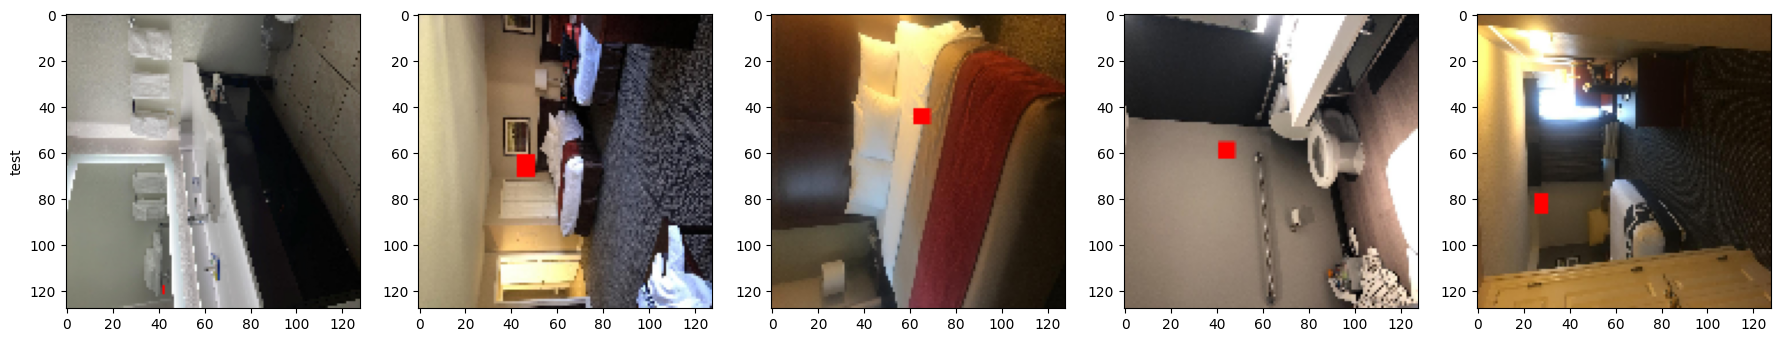

In [84]:
show_images(hotel_test, 'test')

In [87]:
from sklearn.metrics import euclidean_distances

def find_matches(query, base_embeds, base_targets, n_matches=5):
    distance_df = pd.DataFrame(index=np.arange(len(base_targets)), data={"hotel_id": base_targets})
    # calculate cosine distance of query embeds to all base embeds
    distance_df["distance"] = euclidean_distances([query], list(base_embeds))[0]
    # sort by distance and hotel_id
    distance_df = distance_df.sort_values(by=["distance", "hotel_id"], ascending=False).reset_index(drop=True)
    # return first 5 different hotel_id_codes
    return distance_df["hotel_id"].unique()[:n_matches]


def predict(args, base_embeddings_df, test_loader, model):
    test_embeds = extract_representations(model, test_loader)
    
    preds = []
    for query_embeds in tqdm(test_embeds, desc="Similarity - match finding"):
        tmp = find_matches(query_embeds, 
                           base_embeddings_df["embeddings"].values, 
                           base_embeddings_df["hotel_id"].values)
        preds.extend([tmp])
        
    return preds